In [1]:
import geopandas as gpd
import folium
import pandas as pd
from shapely.geometry import LineString
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import pandas as pd
# import numpy as np



import xml.etree.ElementTree as ET
import requests
from shapely.geometry import Point
import geopandas as gpd
import folium

import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString

import matplotlib.pyplot as plt
import matplotlib as mpl


## Read the excel file

In [9]:
# Load the spreadsheet to see its structure
file_path = 'Data/Flåm - Roger1000_data.xlsx'
xls = pd.ExcelFile(file_path)

# Load the sheet "Stasjon og Koordinater" to explore the station data
df_stations = pd.read_excel(xls, sheet_name='Stasjon og Koordinater')
# Fjern rader med manglende verdier i Latitude og Longitude
df_stations_clean = df_stations.dropna(subset=['Latitude', 'Longitude'])

# save the cleaned station data

df_stations_clean.to_csv('Data/datasheets_cleaned/stations_cleaned', index=False)



## Plot the route using coordinates from geoJSON

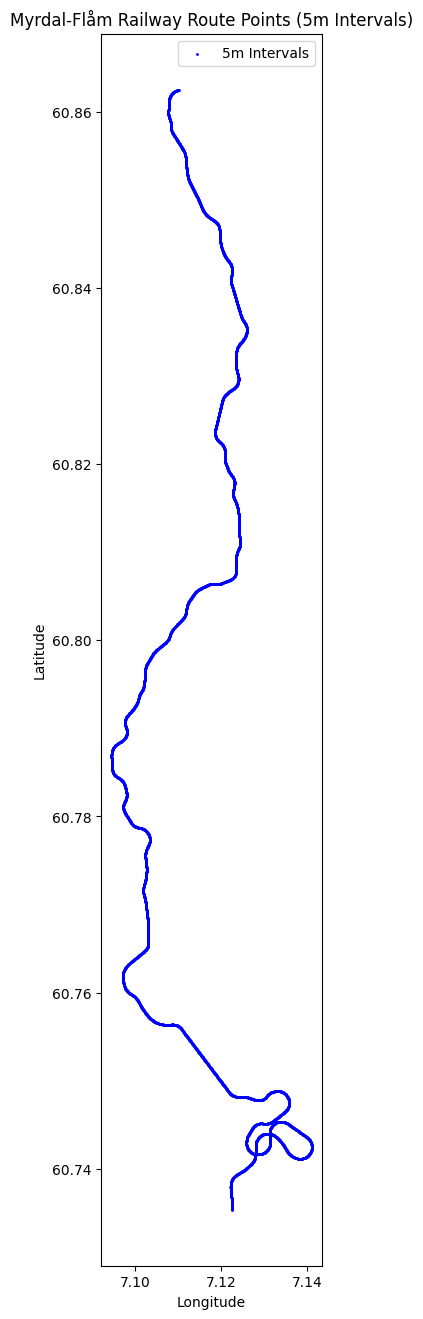

In [6]:

# Load the CSV file
points_df = pd.read_csv("Koordinater/myrdal_flom_route_5m_intervals_with_km.csv")

#Create a GeoDataFrame from the CSV data
geometry = [Point(xy) for xy in zip(points_df['longitude'], points_df['latitude'])]
gdf_points = gpd.GeoDataFrame(points_df, geometry=geometry)

# Set the coordinate reference system to WGS84 (EPSG:4326)
gdf_points.set_crs(epsg=4326, inplace=True)

# Plot the points
fig, ax = plt.subplots(figsize=(12, 16))
gdf_points.plot(ax=ax, markersize=1, color='blue', label='5m Intervals')

# Customize the plot
ax.set_title("Myrdal-Flåm Railway Route Points (5m Intervals)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()
plt.show()


# Plot Wear June 2021

RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
Latitude                        0
Longitude                       0
dtype: int64
RX_HorizontalWearConsumption    9.25
LX_HorizontalWearConsumption    7.40
RX_VerticalWear                 3.00
LX_VerticalWear                 2.94
dtype: float64
RX_HorizontalWearConsumption    -3.02
LX_HorizontalWearConsumption    -2.39
RX_VerticalWear                -13.66
LX_VerticalWear                -13.54
dtype: float64
RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
dtype: int64


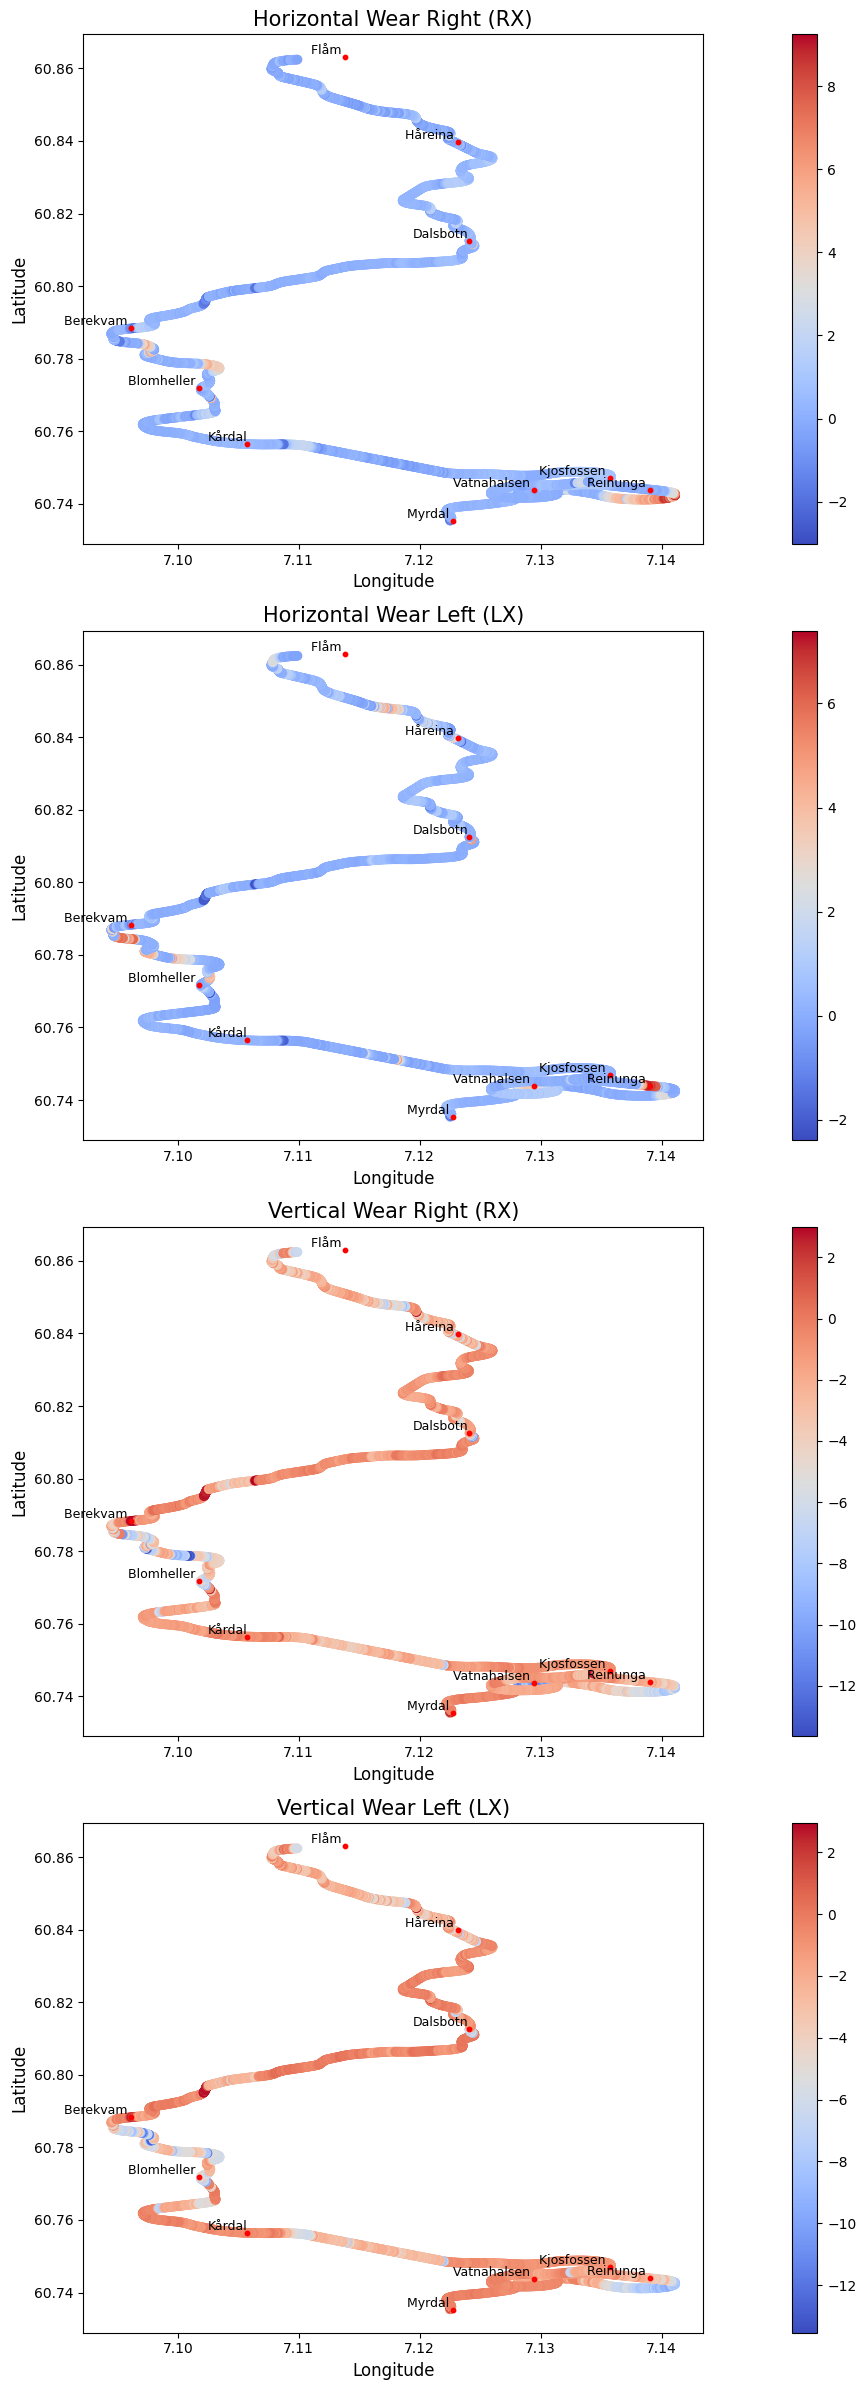

In [10]:

map_data = pd.read_csv('Data/datasheets_cleaned/2021_06_03.csv')
# Check for any remaining missing wear data
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear', 'Latitude', 'Longitude']].isna().sum())

map_data = map_data.sort_values(by='KM')

## Print the max and min values for each wear type

print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].max())
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].min())




print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].isna().sum())

# Create a GeoDataFrame for the slitasjedata
geometry = [Point(xy) for xy in zip(map_data['Longitude'], map_data['Latitude'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

def plot_wear_metrics(gdf, stations_gdf, aspect_ratio=0.3):
    # Increase figure size for readability
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearConsumption', 'Horizontal Wear Right (RX)'),
        ('LX_HorizontalWearConsumption', 'Horizontal Wear Left (LX)'),
        ('RX_VerticalWear', 'Vertical Wear Right (RX)'),
        ('LX_VerticalWear', 'Vertical Wear Left (LX)')
    ]
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(column=column, cmap='coolwarm', legend=True, ax=ax[i])
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_wear_metrics(gdf, df_stations_clean)


# Plot Wear September 2021

RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
Latitude                        1
Longitude                       1
dtype: int64
RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
dtype: int64
RX_HorizontalWearConsumption    9.19
LX_HorizontalWearConsumption    7.25
RX_VerticalWear                 3.00
LX_VerticalWear                 3.00
dtype: float64
RX_HorizontalWearConsumption    -2.59
LX_HorizontalWearConsumption    -2.43
RX_VerticalWear                -13.88
LX_VerticalWear                -13.32
dtype: float64


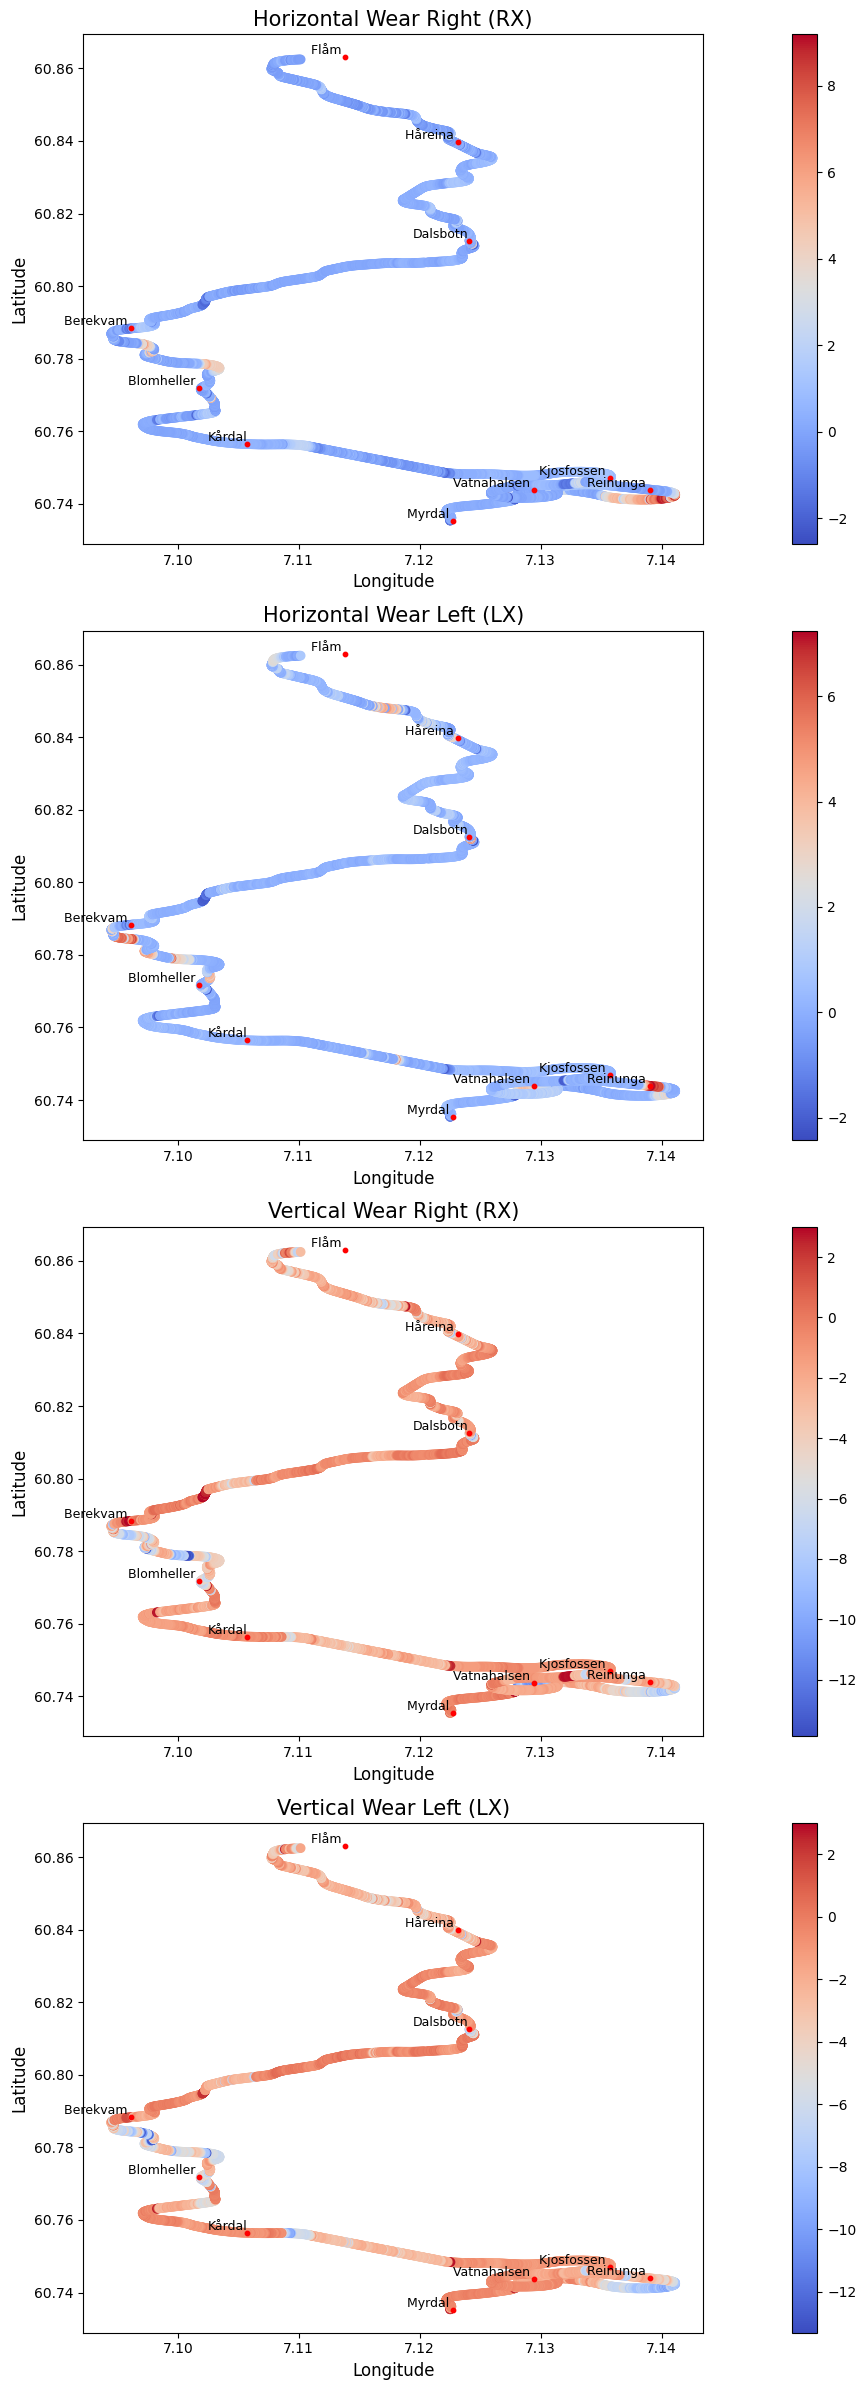

In [11]:

map_data = pd.read_csv('Data/datasheets_cleaned/2021_09_09.csv')
# Check for any remaining missing wear data
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear', 'Latitude', 'Longitude']].isna().sum())

map_data = map_data.sort_values(by='KM')



print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].isna().sum())


print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].max())
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].min())


# Create a GeoDataFrame for the slitasjedata
geometry = [Point(xy) for xy in zip(map_data['Longitude'], map_data['Latitude'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

def plot_wear_metrics(gdf, stations_gdf, aspect_ratio=0.3):
    # Increase figure size for readability
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearConsumption', 'Horizontal Wear Right (RX)'),
        ('LX_HorizontalWearConsumption', 'Horizontal Wear Left (LX)'),
        ('RX_VerticalWear', 'Vertical Wear Right (RX)'),
        ('LX_VerticalWear', 'Vertical Wear Left (LX)')
    ]
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(column=column, cmap='coolwarm', legend=True, ax=ax[i])
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_wear_metrics(gdf, df_stations_clean)


# Plot Wear May 2023

RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
Latitude                        0
Longitude                       0
dtype: int64
RX_HorizontalWearConsumption    9.19
LX_HorizontalWearConsumption    8.21
RX_VerticalWear                 1.41
LX_VerticalWear                 1.28
dtype: float64
RX_HorizontalWearConsumption    -4.96
LX_HorizontalWearConsumption    -4.92
RX_VerticalWear                -11.46
LX_VerticalWear                 -9.71
dtype: float64
RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
dtype: int64


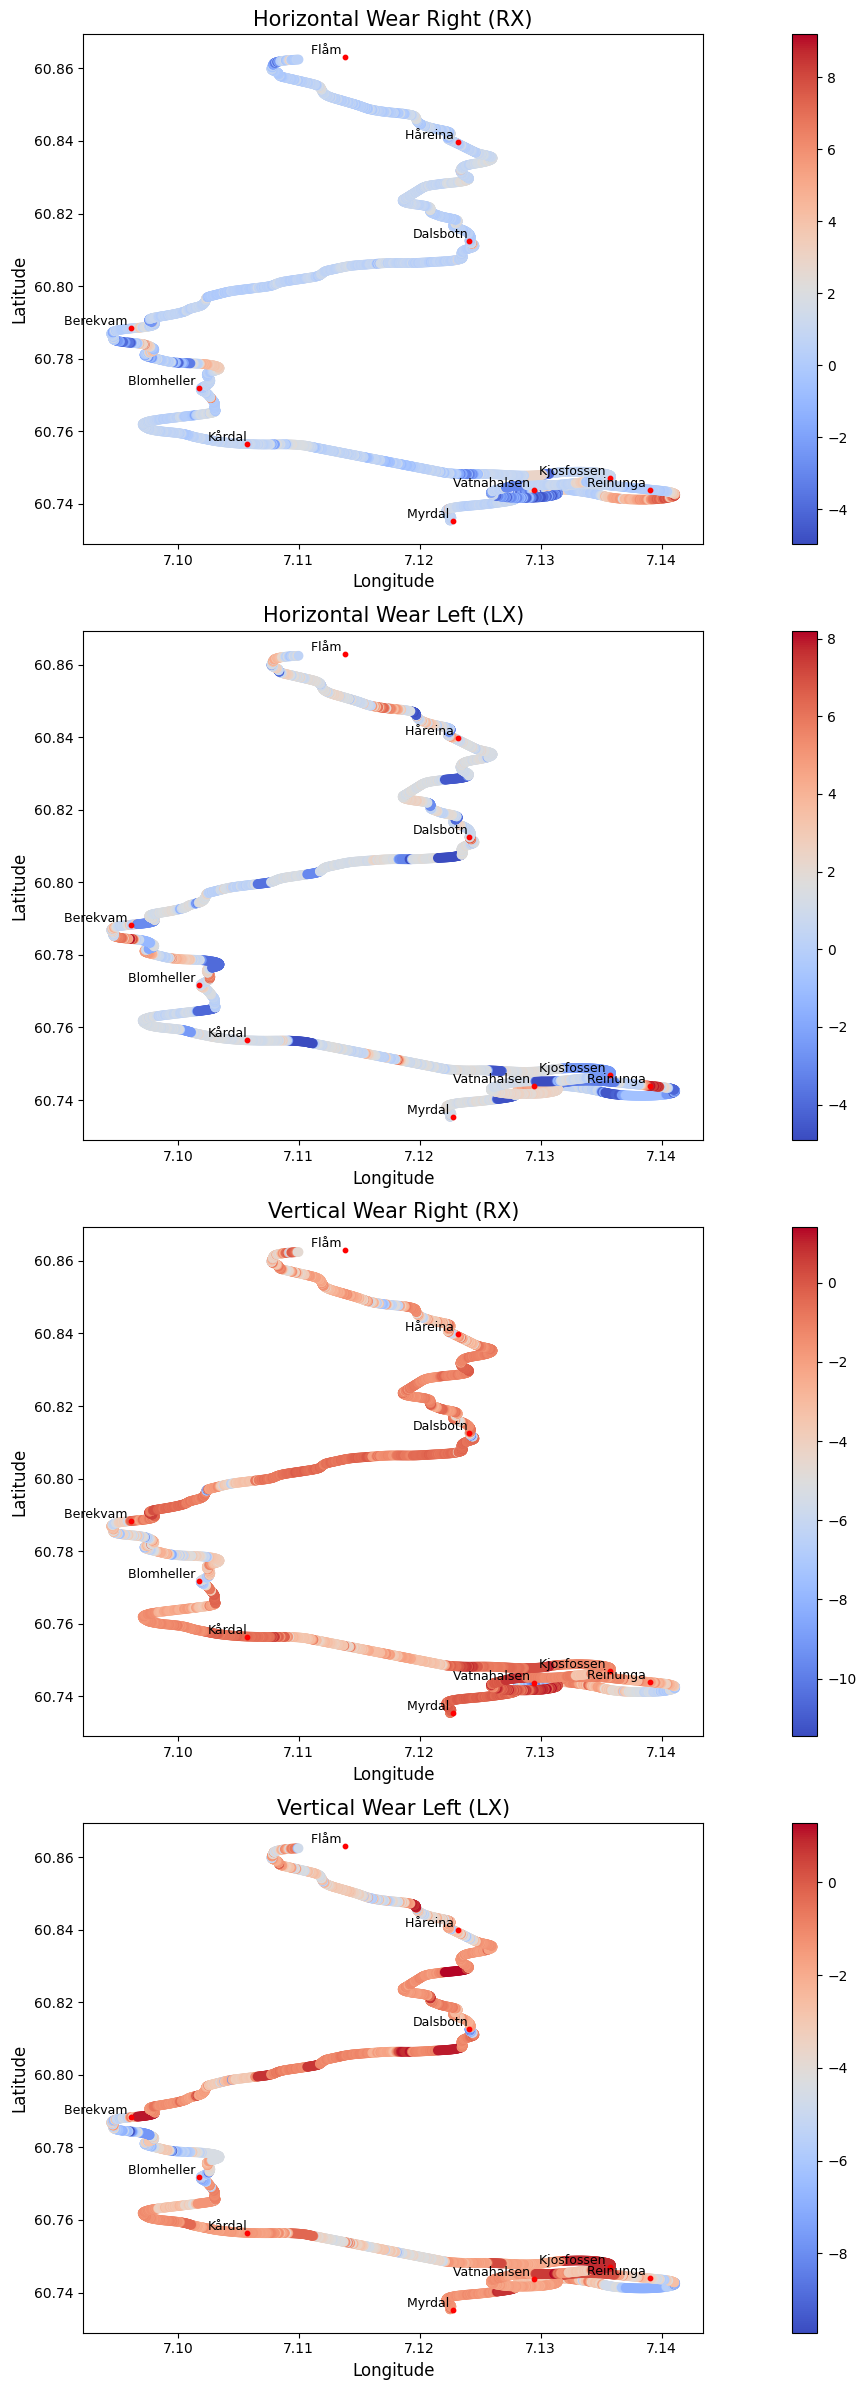

In [12]:

map_data = pd.read_csv('Data/datasheets_cleaned/2023_05_11.csv')
# Check for any remaining missing wear data
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear', 'Latitude', 'Longitude']].isna().sum())

map_data = map_data.sort_values(by='KM')


print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].max())
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].min())



print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].isna().sum())

# Create a GeoDataFrame for the slitasjedata
geometry = [Point(xy) for xy in zip(map_data['Longitude'], map_data['Latitude'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

def plot_wear_metrics(gdf, stations_gdf, aspect_ratio=0.3):
    # Increase figure size for readability
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearConsumption', 'Horizontal Wear Right (RX)'),
        ('LX_HorizontalWearConsumption', 'Horizontal Wear Left (LX)'),
        ('RX_VerticalWear', 'Vertical Wear Right (RX)'),
        ('LX_VerticalWear', 'Vertical Wear Left (LX)')
    ]
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(column=column, cmap='coolwarm', legend=True, ax=ax[i])
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_wear_metrics(gdf, df_stations_clean)


# Plot Wear June 2024

RX_HorizontalWearConsumption    7.03
LX_HorizontalWearConsumption    6.64
RX_VerticalWear                 9.17
LX_VerticalWear                 9.79
dtype: object
RX_HorizontalWearConsumption    -0.00
LX_HorizontalWearConsumption    -0.00
RX_VerticalWear                 -0.00
LX_VerticalWear                 -0.00
dtype: object


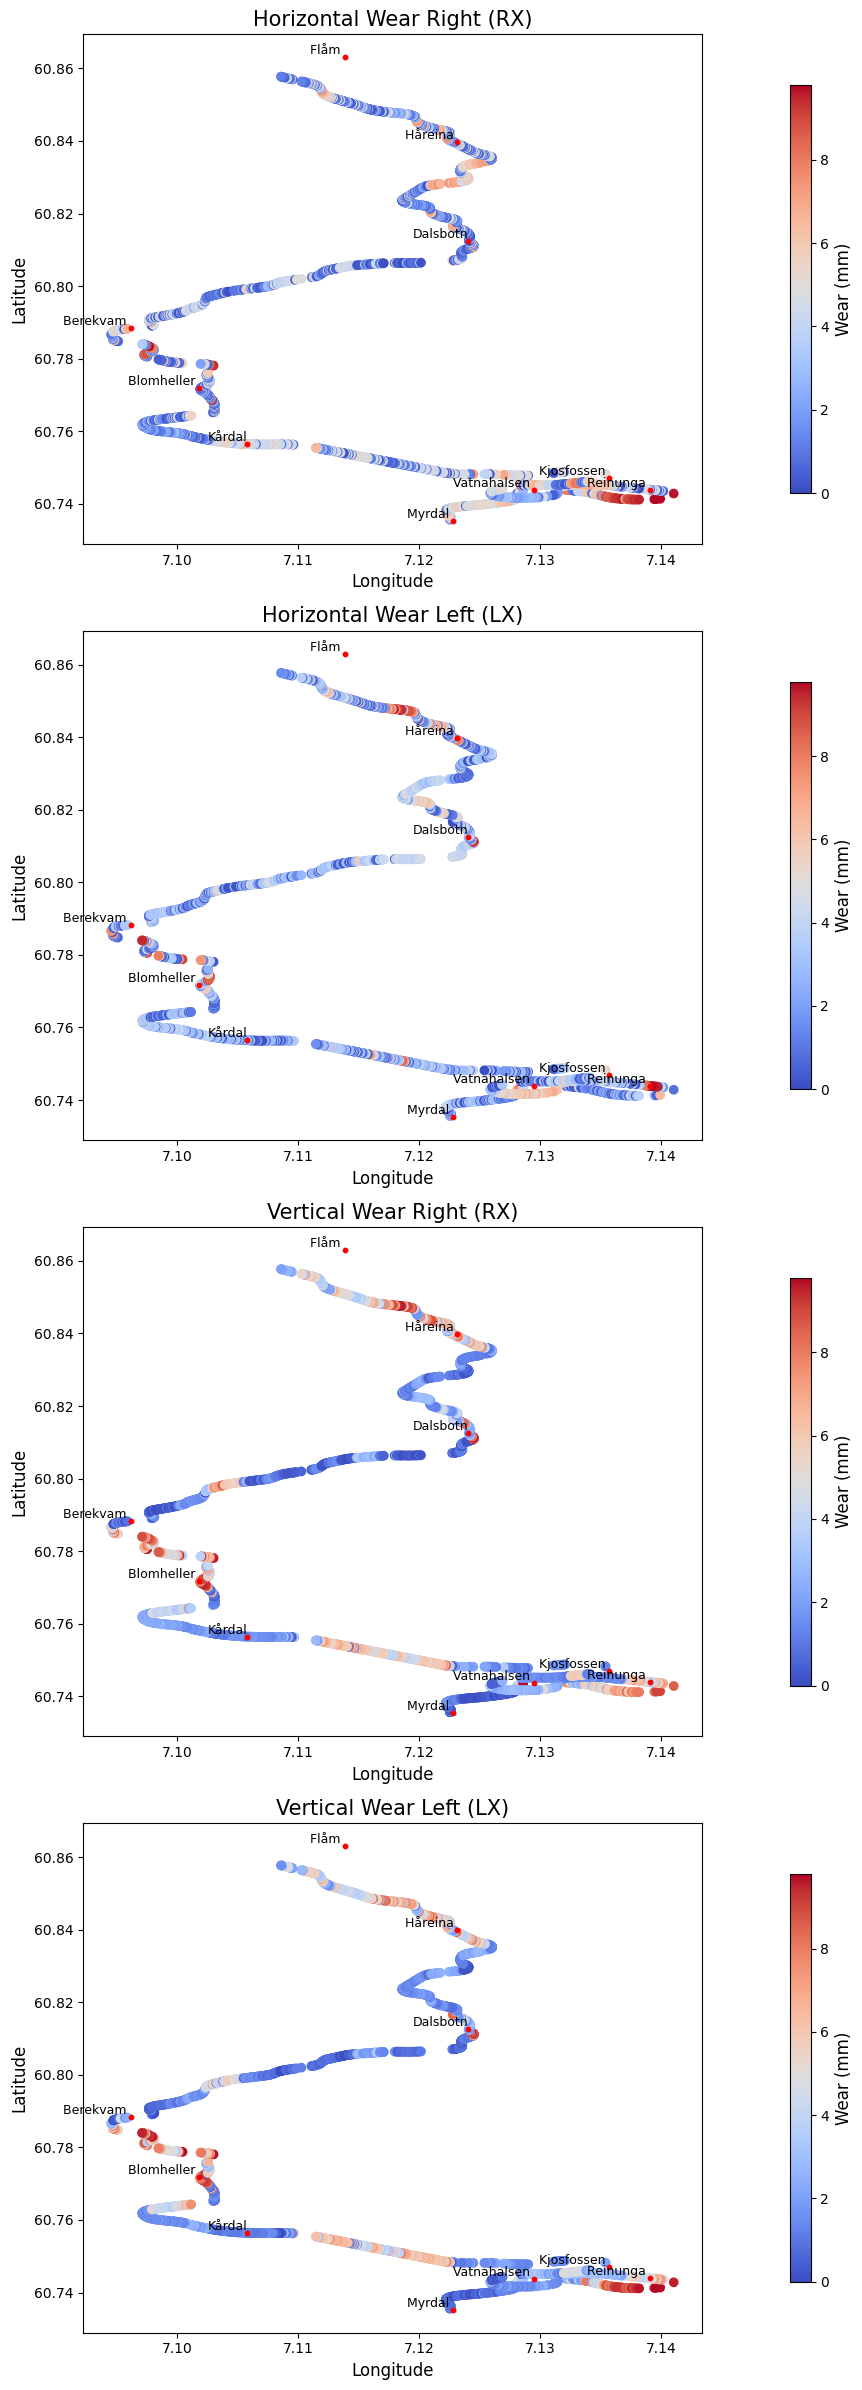

In [15]:

map_data = pd.read_csv('Data/datasheets_cleaned/2024_06_06.csv')


map_data = map_data.sort_values(by='KM')


# Change NV to NaN
map_data = map_data.replace('NV', np.nan)

# remove rows with missing values
map_data = map_data.dropna(subset=['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear'])


print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].max())
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].min())


# Create a GeoDataFrame for the slitasjedata
geometry = [Point(xy) for xy in zip(map_data['Longitude'], map_data['Latitude'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

import matplotlib as mpl

def plot_wear_metrics_continuous(gdf, stations_gdf, aspect_ratio=0.3):
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearConsumption', 'Horizontal Wear Right (RX)'),
        ('LX_HorizontalWearConsumption', 'Horizontal Wear Left (LX)'),
        ('RX_VerticalWear', 'Vertical Wear Right (RX)'),
        ('LX_VerticalWear', 'Vertical Wear Left (LX)')
    ]
    
    # Calculate global vmin and vmax for all metrics
    vmin = gdf[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption',
                'RX_VerticalWear', 'LX_VerticalWear']].min().min()
    vmax = gdf[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption',
                'RX_VerticalWear', 'LX_VerticalWear']].max().max()
    
    # Use a diverging colormap
    cmap = 'coolwarm'
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)  # Continuous normalization

    for i, (column, title) in enumerate(metrics):
        # Plot the data
        gdf.plot(
            column=column,
            cmap=cmap,
            ax=ax[i],
            legend=False  # Disable GeoPandas' default discrete legend
        )
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')

        # Add a continuous colorbar for each plot
        sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # Required for colorbar creation
        cbar = fig.colorbar(sm, ax=ax[i], orientation='vertical', shrink=0.8)
        cbar.set_label('Wear (mm)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Call the updated function
plot_wear_metrics_continuous(gdf, df_stations_clean)

# Plot Wear September 2024

RX_HorizontalWearConsumption    6.42
LX_HorizontalWearConsumption    6.97
RX_VerticalWear                 9.85
LX_VerticalWear                 8.87
dtype: object
RX_HorizontalWearConsumption    -0.01
LX_HorizontalWearConsumption    -0.01
RX_VerticalWear                 -0.04
LX_VerticalWear                 -0.01
dtype: object


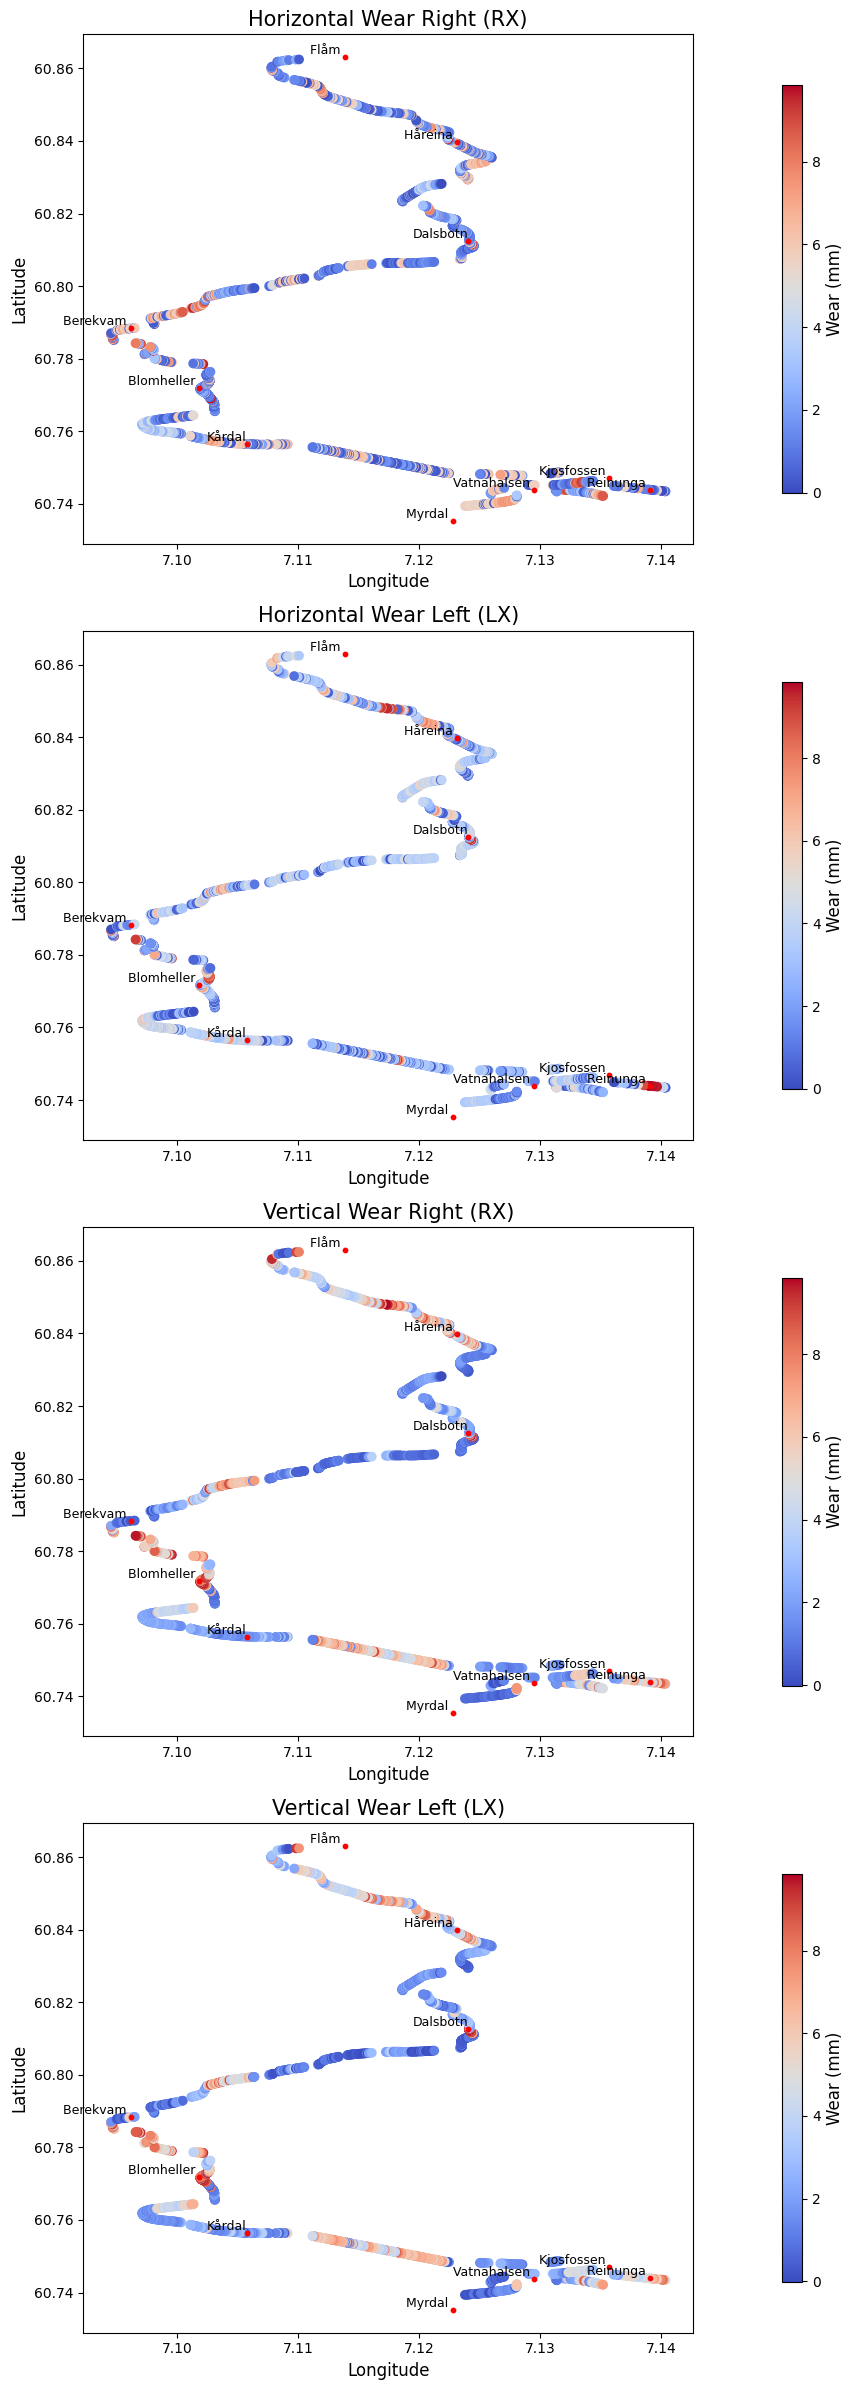

In [16]:

map_data = pd.read_csv('Data/datasheets_cleaned/2024_09_04.csv')


map_data = map_data.sort_values(by='KM')


# Change NV to NaN
map_data = map_data.replace('NV', np.nan)

# remove rows with missing values
map_data = map_data.dropna(subset=['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear'])


print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].max())
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].min())


# Create a GeoDataFrame for the slitasjedata
geometry = [Point(xy) for xy in zip(map_data['Longitude'], map_data['Latitude'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

import matplotlib as mpl

def plot_wear_metrics_continuous(gdf, stations_gdf, aspect_ratio=0.3):
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearConsumption', 'Horizontal Wear Right (RX)'),
        ('LX_HorizontalWearConsumption', 'Horizontal Wear Left (LX)'),
        ('RX_VerticalWear', 'Vertical Wear Right (RX)'),
        ('LX_VerticalWear', 'Vertical Wear Left (LX)')
    ]
    
    # Calculate global vmin and vmax for all metrics
    vmin = gdf[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption',
                'RX_VerticalWear', 'LX_VerticalWear']].min().min()
    vmax = gdf[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption',
                'RX_VerticalWear', 'LX_VerticalWear']].max().max()
    
    # Use a diverging colormap
    cmap = 'coolwarm'
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)  # Continuous normalization

    for i, (column, title) in enumerate(metrics):
        # Plot the data
        gdf.plot(
            column=column,
            cmap=cmap,
            ax=ax[i],
            legend=False  # Disable GeoPandas' default discrete legend
        )
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')

        # Add a continuous colorbar for each plot
        sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # Required for colorbar creation
        cbar = fig.colorbar(sm, ax=ax[i], orientation='vertical', shrink=0.8)
        cbar.set_label('Wear (mm)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Call the updated function
plot_wear_metrics_continuous(gdf, df_stations_clean)

# Plotting wear rate between May 2021 and September 2021

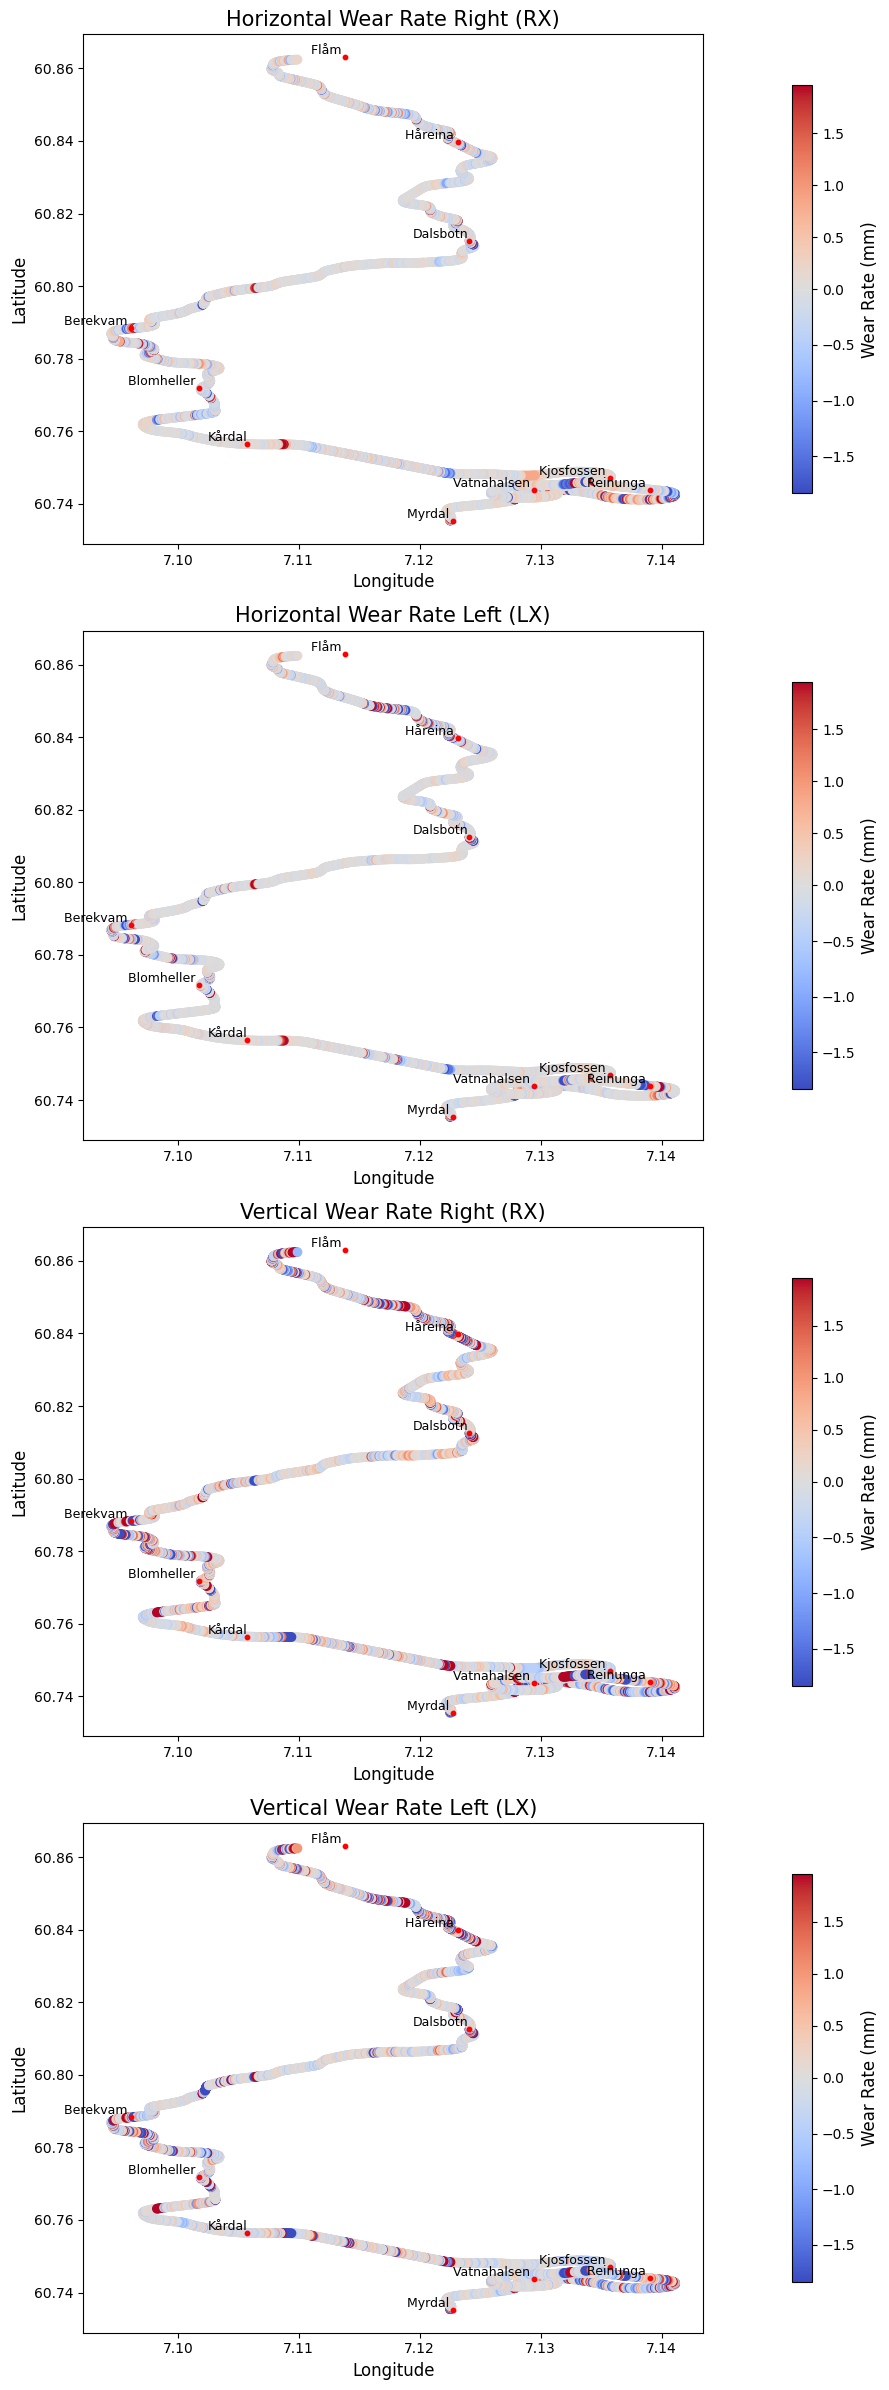

In [22]:
# Load the datasets
june_2021 = pd.read_csv('Data/datasheets_cleaned/2021_06_03.csv')
september_2021 = pd.read_csv('Data/datasheets_cleaned/2021_09_09.csv')

# Ensure data is sorted by KM for consistency
june_2021 = june_2021.sort_values(by='KM')
september_2021 = september_2021.sort_values(by='KM')

# Merge the datasets on KM
merged_data = pd.merge(june_2021, september_2021, on='KM', suffixes=('_june', '_september'))

# Calculate wear rate for each metric
merged_data['RX_HorizontalWearRate'] = merged_data['RX_HorizontalWearConsumption_september'] - merged_data['RX_HorizontalWearConsumption_june']
merged_data['LX_HorizontalWearRate'] = merged_data['LX_HorizontalWearConsumption_september'] - merged_data['LX_HorizontalWearConsumption_june']
merged_data['RX_VerticalWearRate'] = merged_data['RX_VerticalWear_september'] - merged_data['RX_VerticalWear_june']
merged_data['LX_VerticalWearRate'] = merged_data['LX_VerticalWear_september'] - merged_data['LX_VerticalWear_june']


# Create a GeoDataFrame for plotting
geometry = [Point(xy) for xy in zip(merged_data['Longitude_june'], merged_data['Latitude_june'])]
gdf_wear_rate = gpd.GeoDataFrame(merged_data, geometry=geometry)

# Create a GeoDataFrame for plotting
geometry = [Point(xy) for xy in zip(merged_data['Longitude_june'], merged_data['Latitude_june'])]
gdf_wear_rate = gpd.GeoDataFrame(merged_data, geometry=geometry)

def plot_wear_rate_adjusted(gdf, stations_gdf, vmin, vmax, aspect_ratio=0.3):
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearRate', 'Horizontal Wear Rate Right (RX)'),
        ('LX_HorizontalWearRate', 'Horizontal Wear Rate Left (LX)'),
        ('RX_VerticalWearRate', 'Vertical Wear Rate Right (RX)'),
        ('LX_VerticalWearRate', 'Vertical Wear Rate Left (LX)')
    ]
    
    # Use a diverging colormap with a midpoint at 0
    norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    sm = mpl.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(
            column=column,
            cmap='coolwarm',
            ax=ax[i],
            norm=norm
        )
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')

        # Add a custom colorbar for each subplot
        cbar = fig.colorbar(sm, ax=ax[i], orientation='vertical', shrink=0.8)
        cbar.set_label('Wear Rate (mm)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    
# Use adjusted percentiles for vmin and vmax
vmin = merged_data[['RX_HorizontalWearRate', 'LX_HorizontalWearRate', 
                    'RX_VerticalWearRate', 'LX_VerticalWearRate']].quantile(0.05).min()
vmax = merged_data[['RX_HorizontalWearRate', 'LX_HorizontalWearRate', 
                    'RX_VerticalWearRate', 'LX_VerticalWearRate']].quantile(0.95).max()

plot_wear_rate_adjusted(gdf_wear_rate, df_stations_clean, vmin, vmax)



# Plotting wear rate between September 2021 and May 2023

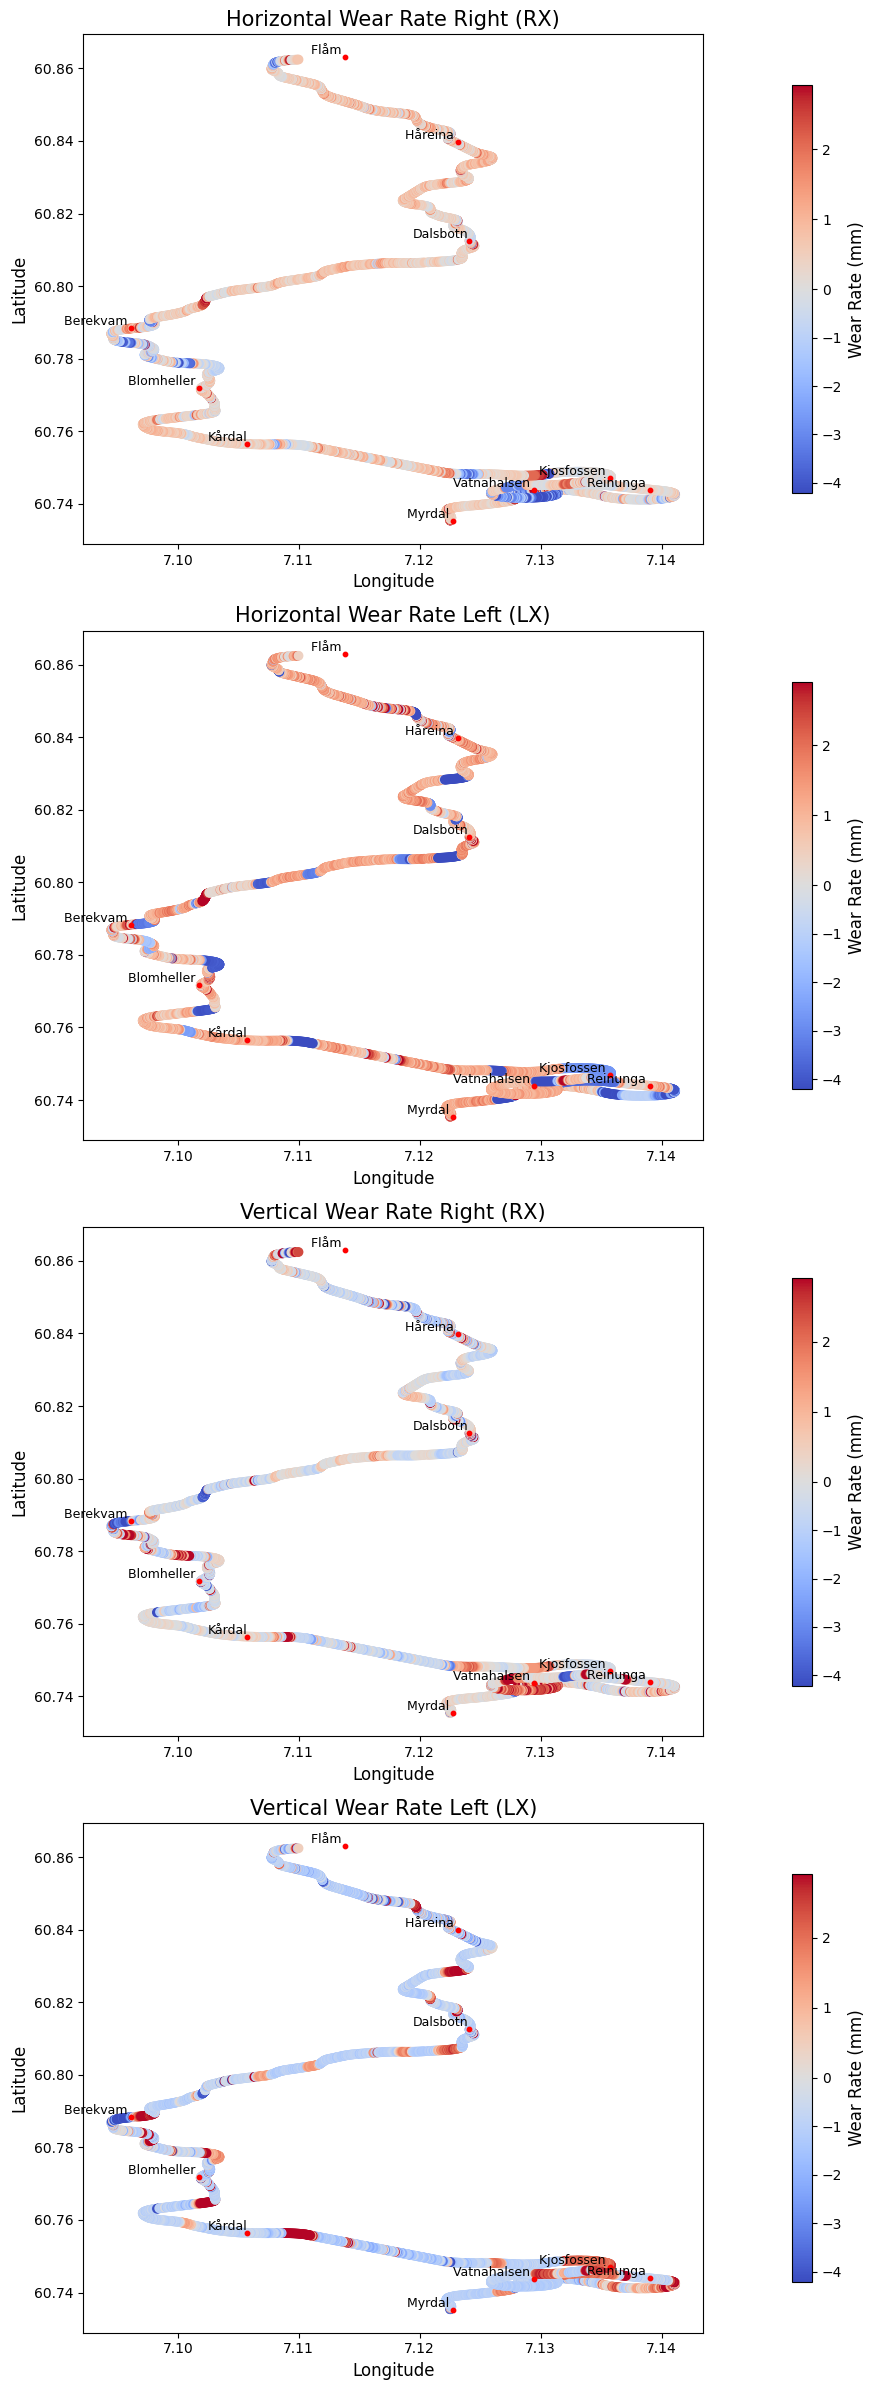

In [24]:
# Load the datasets
september_2021 = pd.read_csv('Data/datasheets_cleaned/2021_09_09.csv')
may_2023 = pd.read_csv('Data/datasheets_cleaned/2023_05_11.csv')

# Ensure data is sorted by KM for consistency
september_2021 = september_2021.sort_values(by='KM')
may_2023 = may_2023.sort_values(by='KM')

# Merge the datasets on KM
merged_data = pd.merge(september_2021, may_2023, on='KM', suffixes=('_september', '_may'))

# Calculate wear rate for each metric
merged_data['RX_HorizontalWearRate'] = merged_data['RX_HorizontalWearConsumption_may'] - merged_data['RX_HorizontalWearConsumption_september']
merged_data['LX_HorizontalWearRate'] = merged_data['LX_HorizontalWearConsumption_may'] - merged_data['LX_HorizontalWearConsumption_september']
merged_data['RX_VerticalWearRate'] = merged_data['RX_VerticalWear_may'] - merged_data['RX_VerticalWear_september']
merged_data['LX_VerticalWearRate'] = merged_data['LX_VerticalWear_may'] - merged_data['LX_VerticalWear_september']


# Create a GeoDataFrame for plotting
geometry = [Point(xy) for xy in zip(merged_data['Longitude_september'], merged_data['Latitude_september'])]
gdf_wear_rate = gpd.GeoDataFrame(merged_data, geometry=geometry)


def plot_wear_rate_adjusted(gdf, stations_gdf, vmin, vmax, aspect_ratio=0.3):
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearRate', 'Horizontal Wear Rate Right (RX)'),
        ('LX_HorizontalWearRate', 'Horizontal Wear Rate Left (LX)'),
        ('RX_VerticalWearRate', 'Vertical Wear Rate Right (RX)'),
        ('LX_VerticalWearRate', 'Vertical Wear Rate Left (LX)')
    ]
    
    # Use a diverging colormap with a midpoint at 0
    norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    sm = mpl.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(
            column=column,
            cmap='coolwarm',
            ax=ax[i],
            norm=norm
        )
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')

        # Add a custom colorbar for each subplot
        cbar = fig.colorbar(sm, ax=ax[i], orientation='vertical', shrink=0.8)
        cbar.set_label('Wear Rate (mm)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    
# Use adjusted percentiles for vmin and vmax
vmin = merged_data[['RX_HorizontalWearRate', 'LX_HorizontalWearRate', 
                    'RX_VerticalWearRate', 'LX_VerticalWearRate']].quantile(0.05).min()
vmax = merged_data[['RX_HorizontalWearRate', 'LX_HorizontalWearRate', 
                    'RX_VerticalWearRate', 'LX_VerticalWearRate']].quantile(0.95).max()

plot_wear_rate_adjusted(gdf_wear_rate, df_stations_clean, vmin, vmax)



# Curvature extracted using coordinates

       KM   latitude  longitude
0  335845  60.735367   7.122519
1  335850  60.735411   7.122518
2  335855  60.735456   7.122517
3  335860  60.735501   7.122516
4  335865  60.735546   7.122519
LINESTRING (7.122518606043351 60.73536664468369, 7.122517614658341 60.73541143234104, 7.122516623265787 60.73545621999834, 7.122515631865698 60.73550100765554, 7.122518984470722 60.73554574239843, 7.122524602564864 60.73559044813745, 7.122530220669975 60.7356351538765, 7.122538192054233 60.73567976498625, 7.1225475461993275 60.73572432049325, 7.122556900365793 60.73576887600006, 7.122566254553634 60.735813431506664, 7.122575608762848 60.735857987013055, 7.122584962993422 60.73590254251928, 7.122594317245381 60.73594709802526, 7.122599405260472 60.73599180027689, 7.1226029845084815 60.73603655626539, 7.1226065293324865 60.73608131291492, 7.1226100741616545 60.73612606956449, 7.122613618995977 60.73617082621416, 7.122610508756754 60.73621552342969, 7.122603632682462 60.73626018701349, 7.122596756584

/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/ipykernel_9171/4164206525.py:54: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf_wear_curvature = gpd.sjoin(gdf, curvature_gdf, how="inner", predicate="intersects")


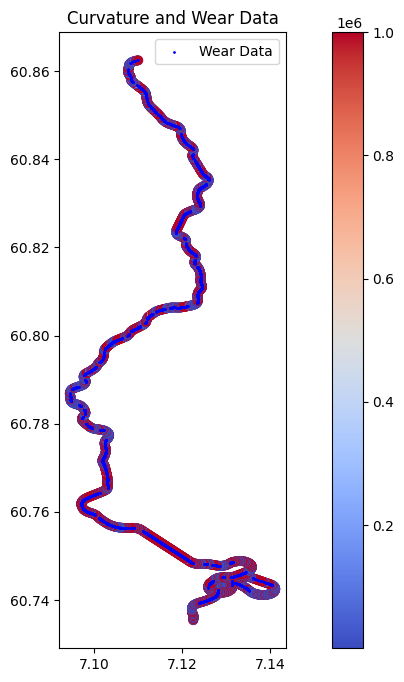

In [28]:
import numpy as np
from shapely.geometry import Point, LineString
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the file with coordinates
coordinates_df = pd.read_csv('Koordinater/myrdal_flom_route_5m_intervals_with_km.csv')

# Check the first few rows to ensure proper format
print(coordinates_df.head())

# Ensure the required columns are present
if not {'latitude', 'longitude'}.issubset(coordinates_df.columns):
    raise ValueError("The file must contain 'latitude' and 'longitude' columns.")

# Create a LineString using the coordinates
coordinates = list(zip(coordinates_df['longitude'], coordinates_df['latitude']))
route_line = LineString(coordinates)

# Print the LineString to verify
print(route_line)


# Calculate curvature (example: using segment-based angles)
def calculate_curvature(line, segment_length=5):
    curvatures = []
    coords = np.array(line.coords)
    for i in range(1, len(coords) - 1):
        # Calculate angle between consecutive segments
        vec1 = coords[i] - coords[i - 1]
        vec2 = coords[i + 1] - coords[i]
        angle = np.arccos(np.dot(vec1, vec2) / 
                          (np.linalg.norm(vec1) * np.linalg.norm(vec2)))
        curvature = 1 / np.maximum(np.tan(angle / 2), 1e-6)  # Avoid division by zero
        curvatures.append((coords[i], curvature))
    return curvatures

# Apply curvature calculation
curvature_data = calculate_curvature(route_line)

# Create a GeoDataFrame for curvature
curvature_gdf = gpd.GeoDataFrame(
    {'curvature': [c[1] for c in curvature_data]},
    geometry=[Point(c[0]) for c in curvature_data],
    crs="EPSG:4326"
)

# Define high-curvature regions
curvature_threshold = 1.0  # Example threshold
curvature_gdf['high_curvature'] = curvature_gdf['curvature'] > curvature_threshold

# Merge wear data with curvature regions
gdf_wear_curvature = gpd.sjoin(gdf, curvature_gdf, how="inner", predicate="intersects")

# Calculate average wear for curved regions (numeric columns only)
average_wear_curved = gdf_wear_curvature[gdf_wear_curvature['high_curvature']].select_dtypes(include=[np.number]).mean()
average_wear_non_curved = gdf_wear_curvature[~gdf_wear_curvature['high_curvature']].select_dtypes(include=[np.number]).mean()


# Visualize curved regions with wear
fig, ax = plt.subplots(figsize=(12, 8))
curvature_gdf.plot(ax=ax, column='curvature', cmap='coolwarm', legend=True)
gdf.plot(ax=ax, color='blue', markersize=1, label='Wear Data')
plt.title('Curvature and Wear Data')
plt.legend()
plt.show()


TypeError: Legend.__init__() got an unexpected keyword argument 'label'

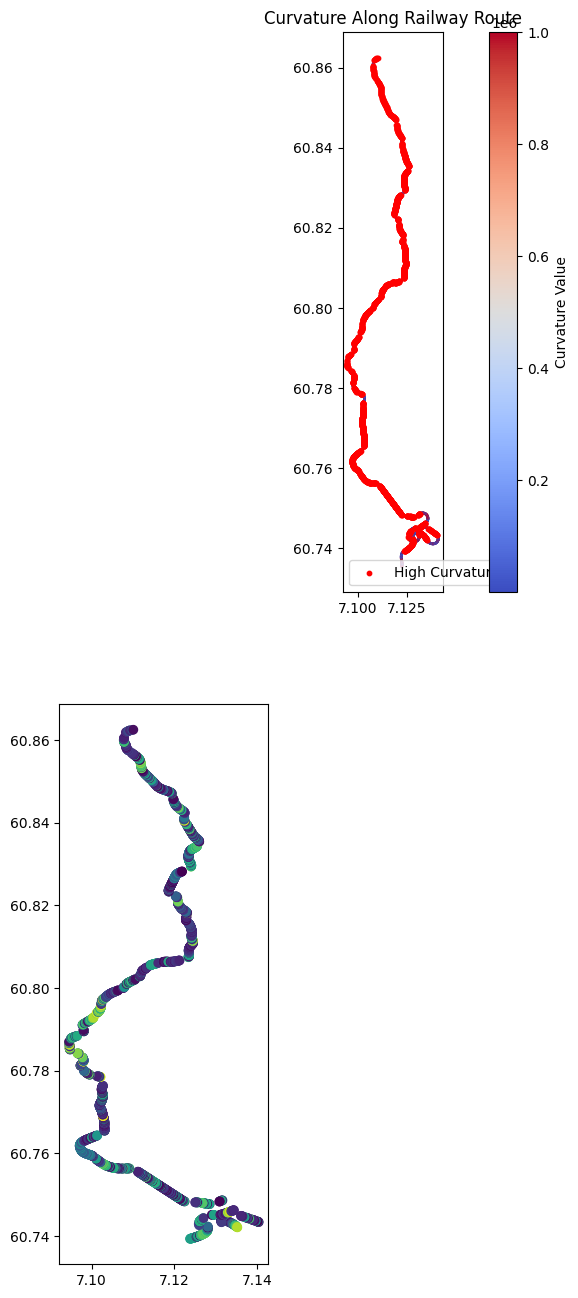

In [29]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString

# Assuming gdf_wear_curvature contains wear and curvature data
# Separate high-curvature and low-curvature data
high_curvature = gdf_wear_curvature[gdf_wear_curvature['high_curvature']]
low_curvature = gdf_wear_curvature[~gdf_wear_curvature['high_curvature']]

# Plot curvature and wear separately
fig, ax = plt.subplots(2, 1, figsize=(12, 16))

# Plot curvature
curvature_gdf.plot(
    ax=ax[0], 
    column='curvature', 
    cmap='coolwarm', 
    legend=True, 
    legend_kwds={'label': "Curvature Value"},
    markersize=1
)
ax[0].set_title("Curvature Along Railway Route")
ax[0].scatter(
    high_curvature['geometry'].x, 
    high_curvature['geometry'].y, 
    color='red', 
    s=10, 
    label="High Curvature"
)
ax[0].legend()

# Plot wear data with high-curvature regions highlighted
gdf_wear_curvature.plot(
    ax=ax[1], 
    column='RX_HorizontalWearConsumption', 
    cmap='viridis', 
    legend=True, 
    legend_kwds={'label': "Horizontal Wear (RX)"}
)
ax[1].scatter(
    high_curvature['geometry'].x, 
    high_curvature['geometry'].y, 
    color='red', 
    s=10, 
    label="High Curvature Regions"
)
ax[1].set_title("Wear Data with High-Curvature Regions Highlighted")
ax[1].legend()

plt.tight_layout()
plt.show()
